In [1]:
def combinefour(outputfilename,spec1,z1,scale1,spec2,z2,scale2,spec3,z3,scale3,spec4,z4,scale4):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import astropy.units as u

    plt.rcParams['figure.figsize'] = [12, 5]
    plt.rcParams.update({'font.size': 12})
    #df1 = pd.read_csv(\"SN2022hrs_G430L_20220422.32.dat\", sep=' ', header=None)
    #df2 = pd.read_csv(\"SN20222hrs_muv_20220422.4.dat\", sep=' ', header=None)
    #arr = []
    wavelength1=[]
    flux1=[]
    wavelength2=[]
    flux2=[]
    wavelength3=[]
    flux3=[]
    wavelength4=[]
    flux4=[]
    flux4err=[]
    flux3err=[]
    flux2err=[]
    flux1err=[]

    f1 = open(spec1, 'r')
    for line in f1:
        line = line.strip()
        columns = line.split()
        wavelength1.append(float(columns[0]))
        flux1.append(float(columns[1]))
        #flux1err.append(float(columns[2]))
    f1.close()    


    f2 = open(spec2, 'r')
    for line in f2:
        line = line.strip()
        columns = line.split()
        wavelength2.append(float(columns[0]))
        flux2.append(float(columns[1]))
        #flux2err.append(float(columns[2]))
    f2.close()    


    f3 = open(spec3, 'r')
    for line in f3:
        line = line.strip()
        columns = line.split()
        wavelength3.append(float(columns[0]))
        flux3.append(float(columns[1]))
        #flux3err.append(float(columns[2]))
    f3.close()    



    f4 = open(spec4, 'r')
    for line in f4:
        line = line.strip()
        columns = line.split()
        wavelength4.append(float(columns[0]))
        flux4.append(float(columns[1]))
        #flux4err.append(float(columns[2]))
    flux4=np.array(flux4)
    f4.close()    

    #wavelength1, flux1, flux1err=smoothspec(np.array(wavelength1), np.array(flux1), np.array(flux1err))
    #wavelength2, flux2, flux2err=smoothspec(np.array(wavelength2), np.array(flux2), np.array(flux2err))
    #wavelength3, flux3, flux3err=smoothspec(np.array(wavelength3), np.array(flux3), np.array(flux3err))
    #wavelength4, flux4, flux4err=smoothspec(np.array(wavelength4), np.array(flux4), np.array(flux4err))
    wavelength1, flux1=smoothspec(np.array(wavelength1), np.array(flux1))
    wavelength2, flux2=smoothspec(np.array(wavelength2), np.array(flux2))
    wavelength3, flux3=smoothspec(np.array(wavelength3), np.array(flux3))
    wavelength4, flux4=smoothspec(np.array(wavelength4), np.array(flux4))

    print('made it here fine?')

    plt.plot(wavelength1, scale1*flux1, 'black', label='11fe 140')
    plt.plot(wavelength2, scale2*flux2, 'violet', label='HST 240')
    plt.plot(wavelength3, scale3*flux3, 'green', label='HST 430')
    plt.plot(wavelength4, scale4*flux4, 'red', label='optical')
    plt.xlabel('Wavelength')
    plt.ylabel('Flux')
    plt.xlim([trim1-200,trim1+200])
    plt.ylim([0,10.0**(-15)])
    plt.legend()
    plt.show()
    
    plt.plot(wavelength1, scale1*np.array(flux1), 'black', label='11fe 140')
    plt.plot(wavelength2, scale2*np.array(flux2), 'violet', label='HST 240')
    plt.plot(wavelength3, scale3*np.array(flux3), 'green', label='HST 430')
    plt.plot(wavelength4, scale4*np.array(flux4), 'red', label='optical')
    plt.xlabel('Wavelength')
    plt.ylabel('Flux')
    plt.title('Flux vs Wavelength')
    plt.xlim([trim2-200,trim2+200])
    plt.ylim([0,10.0**(-13)])
    plt.legend()
    plt.show()
    
    plt.plot(wavelength1, scale1*np.array(flux1), 'black', label='11fe 140')
    plt.plot(wavelength2, scale2*np.array(flux2), 'violet', label='HST 240')
    plt.plot(wavelength3, scale3*np.array(flux3), 'green', label='HST 430')
    plt.plot(wavelength4, scale4*np.array(flux4), 'red', label='optical')
    plt.xlabel('Wavelength')
    plt.ylabel('Flux')
    plt.title('Flux vs Wavelength')
    plt.xlim([trim3-200,trim3+200])
    plt.ylim([0,10.0**(-13)])
    plt.legend()
    plt.show()
    
    
    with open(outputfilename, 'w') as f:
        for i in range(len(wavelength1)):
            if wavelength1[i] < trim1* u.AA:
                f.write(str(wavelength1[i].value) + ' ' + str(flux1[i].value))
                f.write('\n')
        for j in range(len(wavelength2)):
            if wavelength2[j] < trim2* u.AA and wavelength2[j] > trim1* u.AA:
                f.write(str(wavelength2[j].value) + ' ' + str(flux2[j].value))
                f.write('\n')
        for k in range(len(wavelength3)):
            if wavelength3[k] < trim3* u.AA and wavelength3[k] > trim2* u.AA:
                f.write(str(wavelength3[k].value) + ' ' + str(flux3[k].value))
                f.write('\n')
        for l in range(len(wavelength4)):
            if wavelength4[l]  > trim3* u.AA:
                f.write(str(wavelength4[l].value) + ' ' + str(flux4[l].value))
                f.write('\n')
   
    return()

In [2]:
def smoothspec(inputwave, inputflux):
    import numpy as np
    import astropy.units as u
    from specutils import Spectrum1D
    from specutils.manipulation import FluxConservingResampler
    #input_spectra = Spectrum1D(flux=inputflux * u.Unit('erg cm-2 s-1 AA-1'), spectral_axis=inputwave * u.AA, uncertainty=inputfluxerr)
    input_spectra = Spectrum1D(flux=inputflux * u.Unit('erg cm-2 s-1 AA-1'), spectral_axis=inputwave * u.AA)
    resample_grid = np.arange(int(min(inputwave/10))*10, int(max(inputwave/10))*10, 10)*u.AA
    fluxc_resample = FluxConservingResampler()
    output_spectrum1D = fluxc_resample(input_spectra, resample_grid) 
    outputwave, outputflux=output_spectrum1D.spectral_axis, output_spectrum1D.flux
    return(outputwave, outputflux)

made it here fine?


/Users/supernova/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


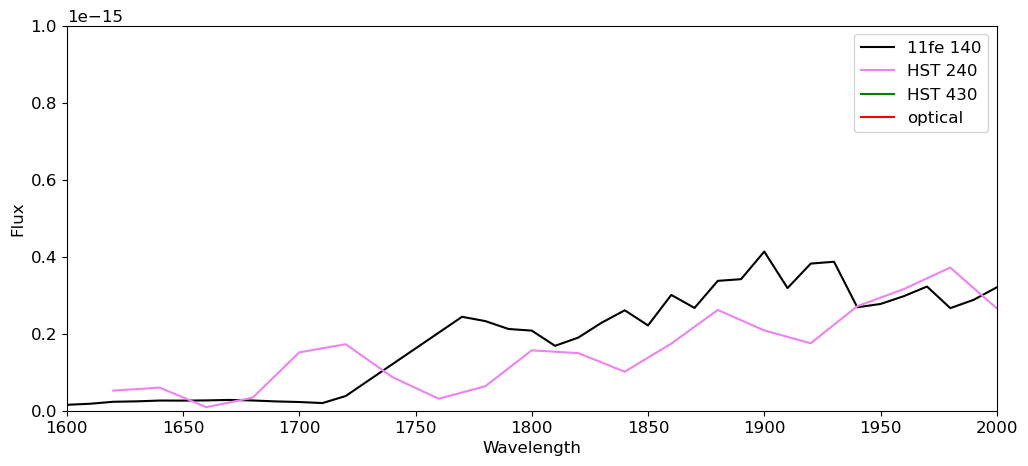

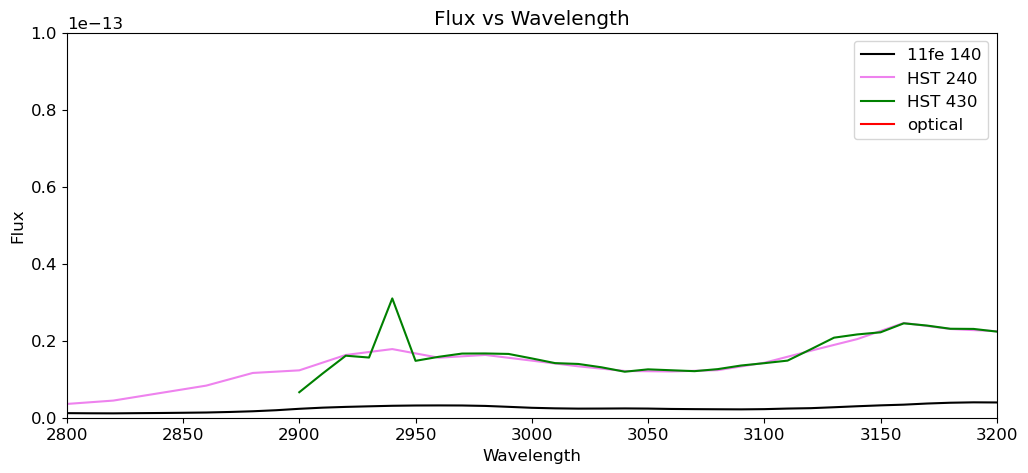

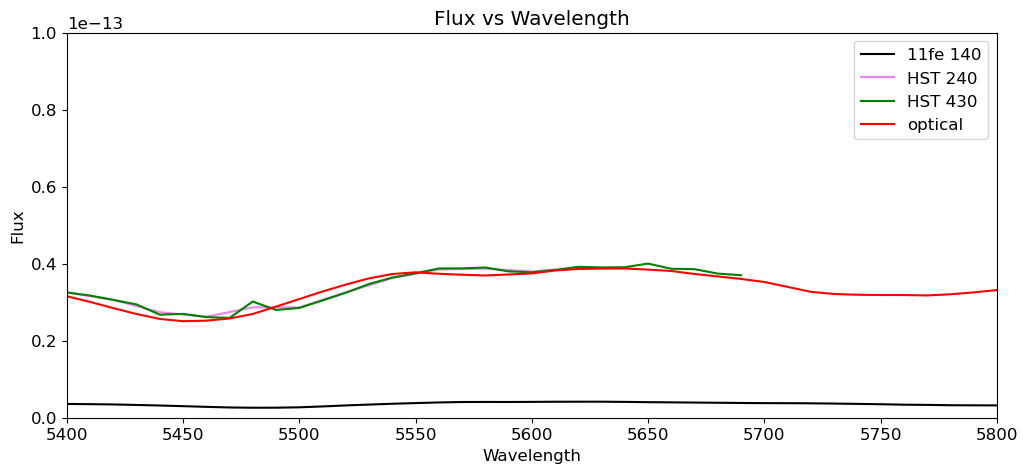

()

In [3]:
spec1='../original_spectra/SN2011fe_2011-09-13_16-05-00_HST_STIS_HST-Ia.dat'
spec2='..//hst_rawdata/SN2022hrs/SN2022hrs_muv_20220427.3_20.dat'
spec3='SN2022hrs_G430L_20220427_1.dat'
spec4='SN2022hrs_20220425_redblu_100756.570.ascii.txt'
outputfilename='../kcorrectiontemplates/SN2022hrs_peak_11fe_appended.dat'
z1=0.000804
z2=0.0047
z3=0.0047
z4=0.0047
scale1=0.01
scale2=1
scale3=1
scale4=1.2
trim1=1800
trim2=3000
trim3=5600
combinefour(outputfilename,spec1,z1,scale1,spec2,z2,scale2,spec3,z3,scale3,spec4,z4,scale4)

In [5]:
#from specutils import Spectrum1D
#spec = Spectrum1D.read('/Users/supernova/Desktop/SN/github/UVSN/hst_rawdata/SN2022hrs/SN2022hrs_muv_20220427.3_20.dat', format='ASCII')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
spec1='../../original_spectra/SN2011fe_2011-09-13_16-05-00_HST_STIS_HST-Ia.dat'
wavelength1=[]
flux1=[]


f1 = open(spec1, 'r')
for line in f1:
    line = line.strip()
    columns = line.split()
    wavelength1.append(float(columns[0]))
    flux1.append(float(columns[1]))
f1.close()    



outputwave, outputflux=smoothspec(np.array(wavelength1), np.array(flux1))


print, outputflux

plt.plot(wavelength1, flux1, 'black')
plt.plot(outputwave, outputflux, 'red')
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.xlim([1500,1700])
plt.ylim([0,10.0**(-14.0)])
plt.legend()
plt.show()
    
 